# Iris Dataset Classification with apenet's Random Forest

This notebook demonstrates how to build, train, and evaluate a Random Forest model using the apenet library, using the Iris Dataset as an example.


## Import Libraries

In [48]:
import os
os.chdir('..')

import numpy as np

# Data Loading
from sklearn.datasets import load_iris

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification

# Import our library
from apenet.rf.decision_tree import DecisionTree
from apenet.rf.random_forest import RandomForest
from apenet.utils.data import train_test_split
from apenet.utils.metrics import accuracy
from apenet.eye.tree import (
    plot_decision_boundaries,
    plot_tree_decisions_3d,
    plot_decision_regions,
    plot_tree_structure,
    plot_feature_importance
)
from apenet.eye.visuals import (
    plot_confusion_matrix,
    plot_feature_distributions
)

## Set Random Generator

In [49]:
rng = np.random.default_rng()

## Load Data

In [50]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

## Preprocess Data

In [51]:
# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, rng=rng)

## Train models

In [52]:
dt = DecisionTree(max_depth=5)
dt.fit(X_train, y_train)

rf = RandomForest(n_trees=20, max_depth=20, rng=rng)
rf.fit(X_train, y_train)

## Predict and Evaluate

In [53]:
# Make predictions
dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)

# Print accuracy
print(f"Decision Tree Accuracy: {accuracy(y_test, dt_preds):.4f}")
print(f"Random Forest Accuracy: {accuracy(y_test, rf_preds):.4f}")

Decision Tree Accuracy: 0.9459
Random Forest Accuracy: 0.9730


# Data Visualization

## Plot confusion matrix

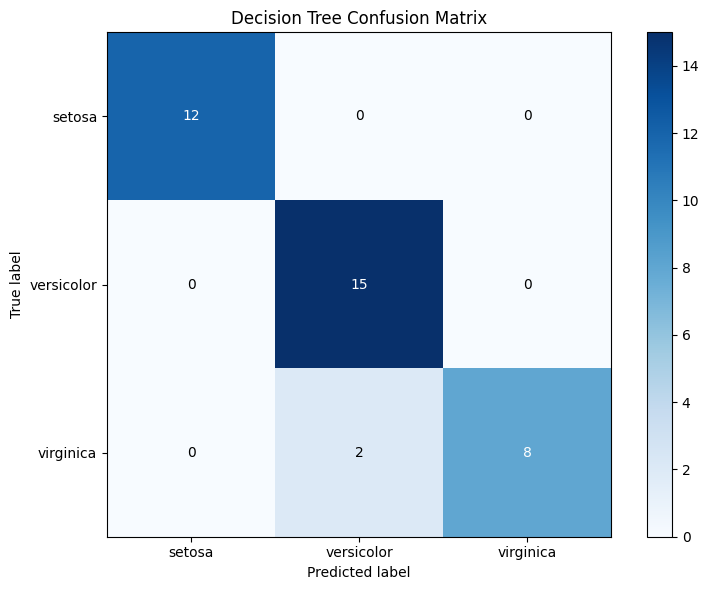

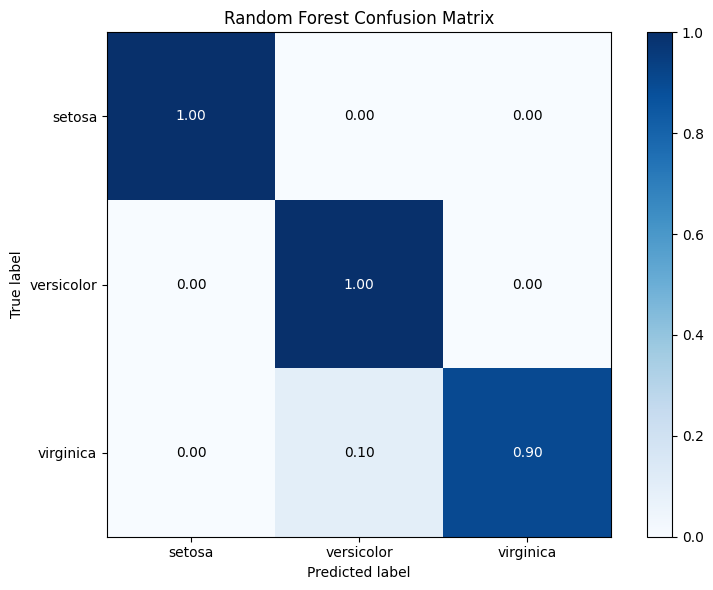

In [54]:
cm_fig1 = plot_confusion_matrix(
    y_test,
    dt_preds,
    class_names=class_names,
    title="Decision Tree Confusion Matrix"
)
cm_fig2 = plot_confusion_matrix(
    y_test,
    rf_preds,
    class_names=class_names,
    title="Random Forest Confusion Matrix",
    normalize=True
)
plt.show()

# Plot feature distributions

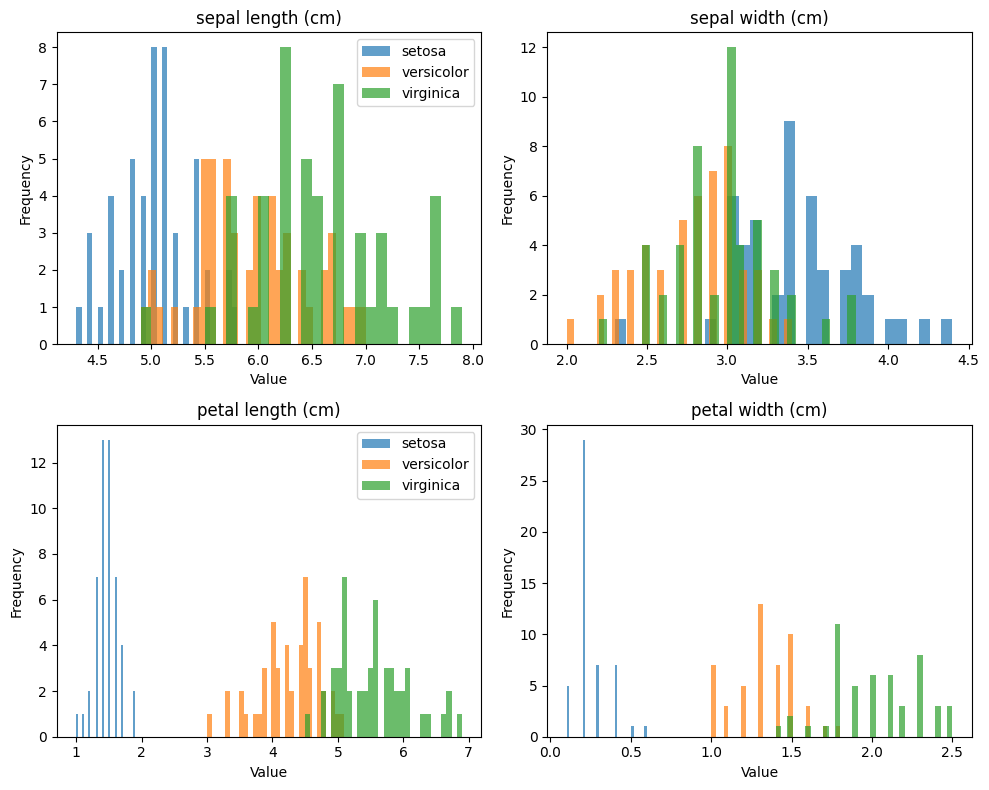

In [55]:
dist_fig = plot_feature_distributions(
    X, 
    y, 
    feature_names=feature_names,
    class_names=class_names,
    n_cols=2
)
plt.show()

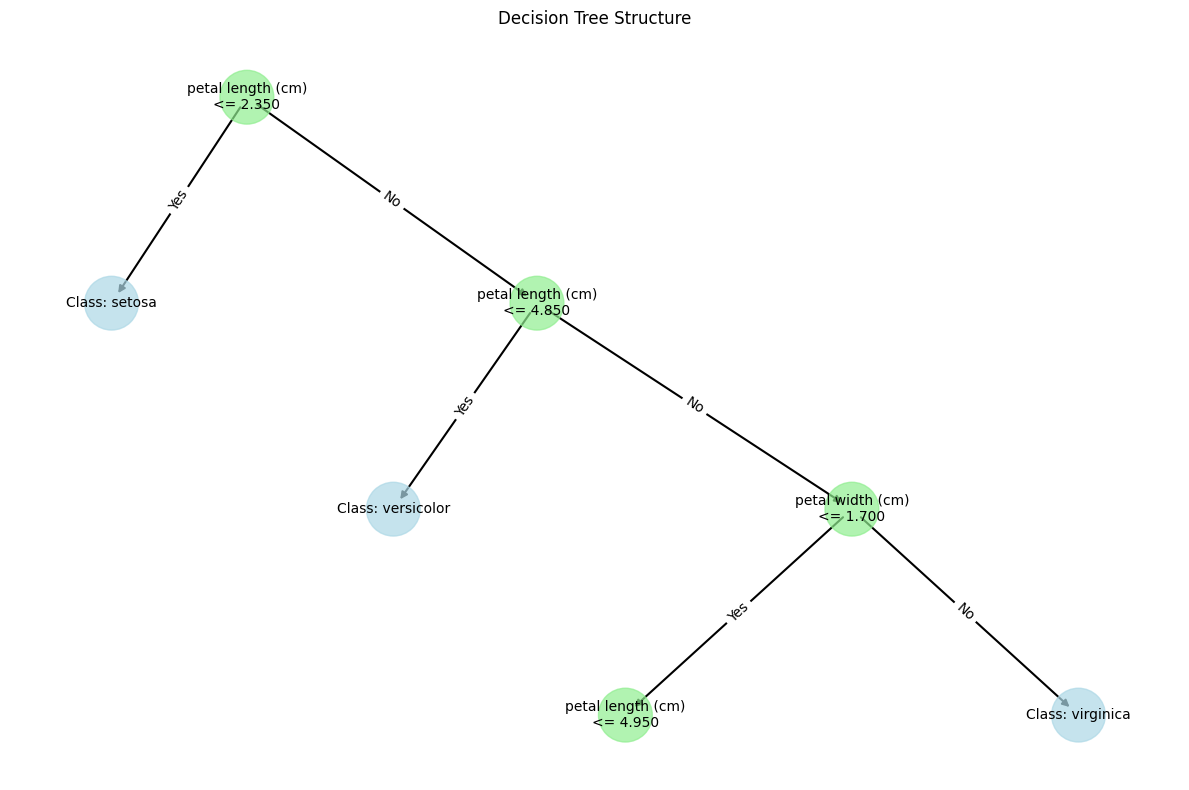

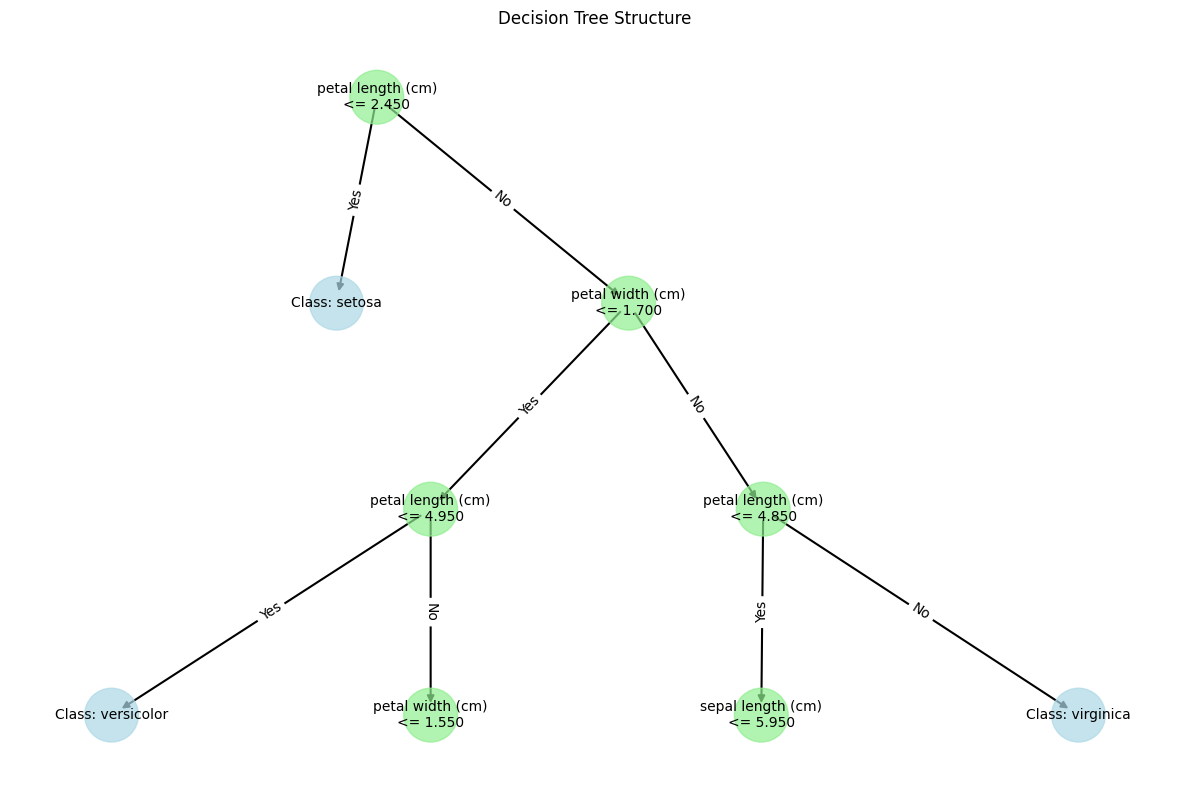

In [58]:
if hasattr(rf, 'trees') and len(rf.trees) > 0:
    rf_ts_fig = plot_tree_structure(
        rf.trees[0],
        max_depth=3,
        feature_names=feature_names,
        class_names=class_names
    )

dt_ts_fig = plot_tree_structure(
    dt,
    max_depth=3,
    feature_names=feature_names,
    class_names=class_names
)

plt.show()


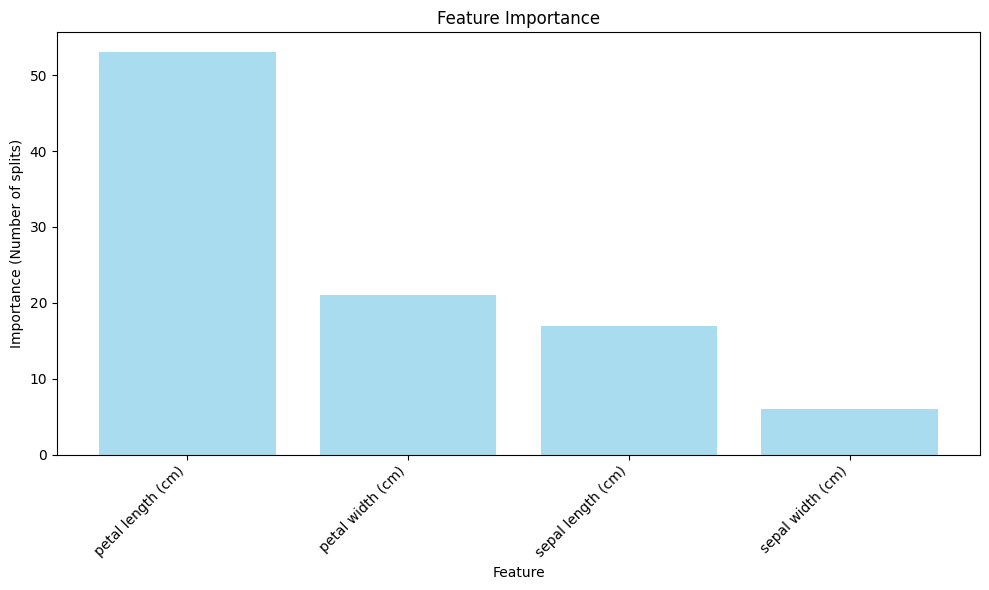

In [59]:
fi_fig = plot_feature_importance(
    rf,
    feature_names=feature_names
)
plt.show()

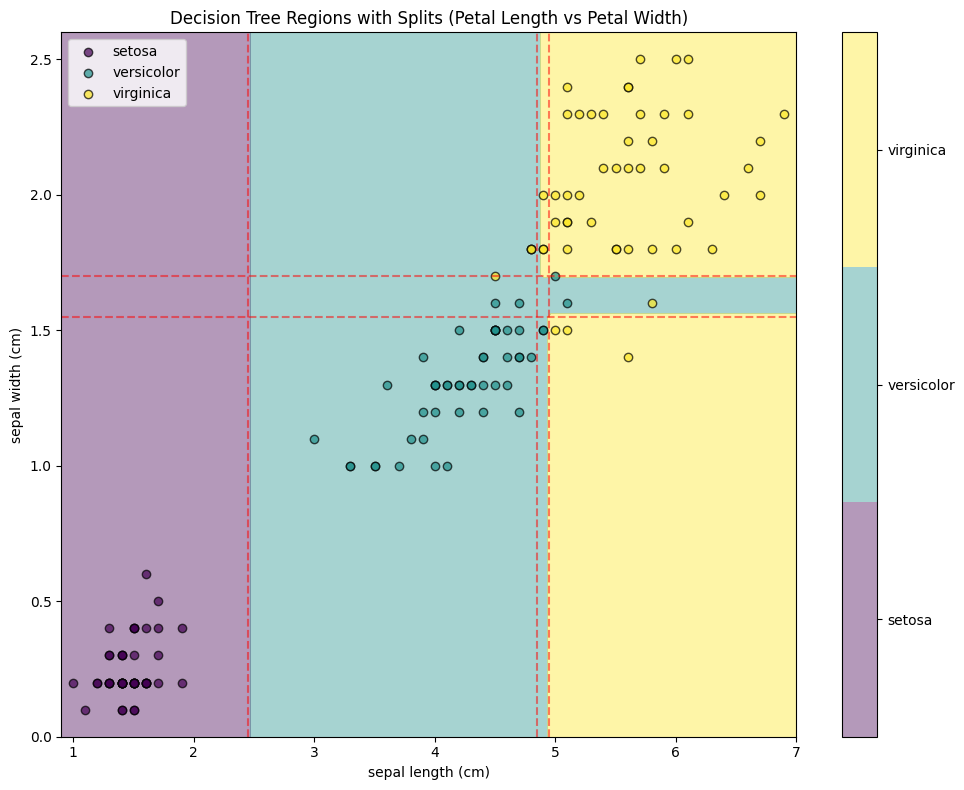

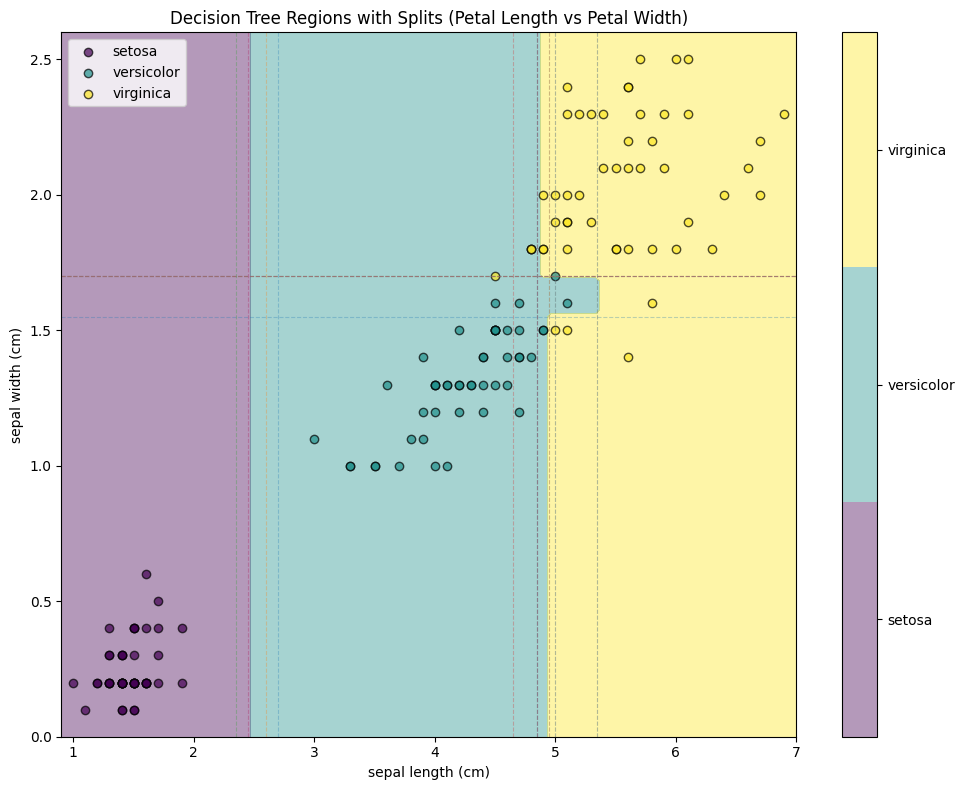

In [60]:
dr_fig = plot_decision_regions(
    dt,
    X,
    y,
    feature_indices=(2, 3),
    feature_names=feature_names,
    class_names=class_names,
    show_tree_splits=True
)
plt.title("Decision Tree Regions with Splits (Petal Length vs Petal Width)")
dr_fig = plot_decision_regions(
    rf,
    X,
    y,
    feature_indices=(2, 3),
    feature_names=feature_names,
    class_names=class_names,
    show_tree_splits=True
)
plt.title("Decision Tree Regions with Splits (Petal Length vs Petal Width)")
plt.show()

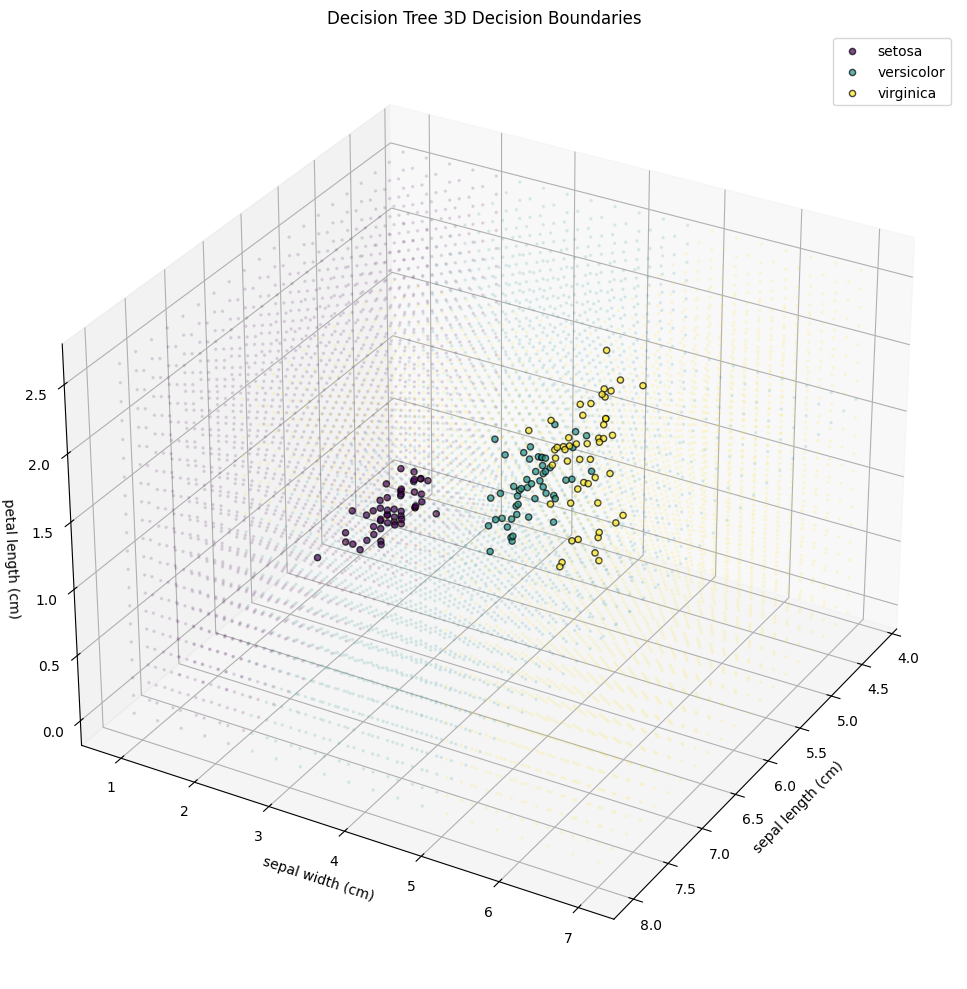

In [61]:
# Choose 3 features for 3D visualization
td3d_fig = plot_tree_decisions_3d(
    dt,
    X,
    y,
    feature_indices=(0, 2, 3),
    feature_names=feature_names,
    class_names=class_names,
    resolution=20
)
plt.title("Decision Tree 3D Decision Boundaries")
plt.show()